<a href="https://colab.research.google.com/github/Wandering-Mind/Stroke_Classifier/blob/main/Stroke_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Machine Learning with Python

# Step 1: Load the stroke dataset

import pandas as pd
url = "https://raw.githubusercontent.com/msabanluc/SalonFirstMLPython/refs/heads/main/healthcare-dataset-stroke-data.csv"
df = pd.read_csv(url)


In [2]:
# Step 2: Explore the dataset

print("First 5 rows:")
display(df.head())

df.info()

First 5 rows:


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB



Class distribution:


,count
stroke,
0,4861
1,249


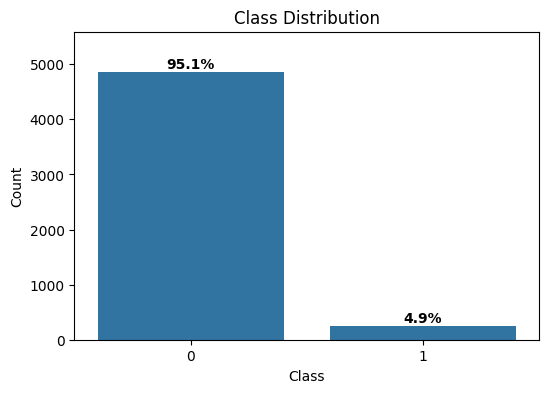

In [3]:
# 2a. Visualize class distribution with counts and percentages

import matplotlib.pyplot as plt
import seaborn as sns

class_counts = df['stroke'].value_counts() # Create a count of each value in "stroke" column (our target)

print("\nClass distribution:")
display(class_counts) # Display that count

class_percent = df['stroke'].value_counts(normalize=True) * 100 # Calculate the percentage of each class

# Create figure plotting class counts
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Class Distribution')
plt.ylabel('Count')
plt.xlabel('Class')

# Add percentages on top of bars
for i, (count, percent) in enumerate(zip(class_counts, class_percent)):
    ax.text(i, count + 5, f'{percent:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.ylim(0, max(class_counts) * 1.15)
plt.show()


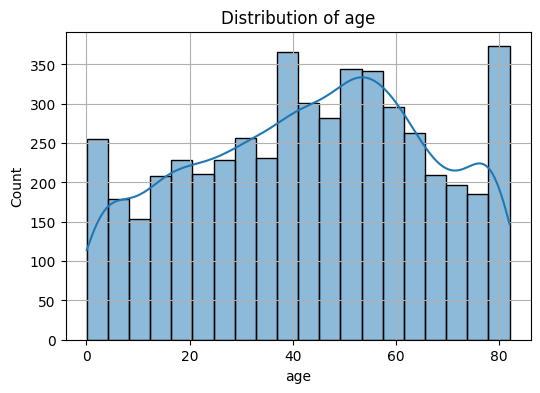

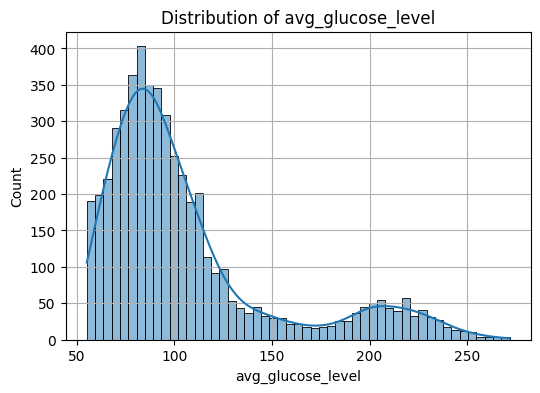

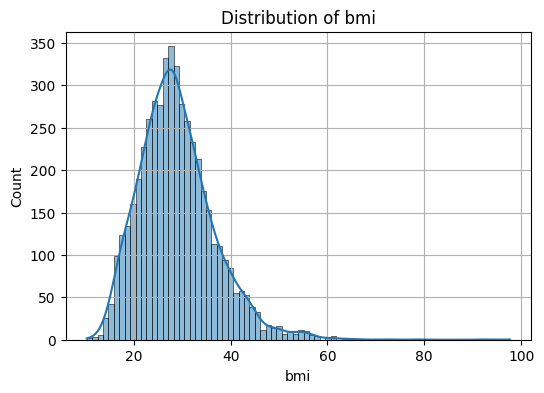

In [4]:
# 2b. Visualize distribution of continuous features

continuous_features = ['age', 'avg_glucose_level', 'bmi']

for col in continuous_features: #For each feature (age, avg_glucose_level, bmi),
    plt.figure(figsize=(6, 4)) #Make a figure
    sns.histplot(data=df, x=col, kde=True) #In the figure, plot a histogram of the given feature on that figure
    plt.title(f"Distribution of {col}") #Assign title to figure
    plt.grid(True) #Plot gridlines
    plt.show() #Show the figure as output


In [9]:
# 3. Clean and prepare data for modeling

# drop ID column if it exists
if 'id' in df.columns:
    df = df.drop(columns=['id'])

# Remove patients under 18, since stroke is very rare in children and BMI is less meaningful
df = df[df['age'] >= 18]

# Handle missing BMI
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

# One-hot encode categoricals
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Define features and target
X = df_encoded.drop(columns='stroke')
y = df_encoded['stroke']

Top features correlated with stroke:


,0
age,0.250861
avg_glucose_level,0.127790
heart_disease,0.126854
hypertension,0.116229
ever_married_Yes,0.062278
smoking_status_formerly smoked,0.050222
work_type_Self-employed,0.046515
work_type_Private,0.027623
smoking_status_never smoked,0.023949
gender_Male,0.021862


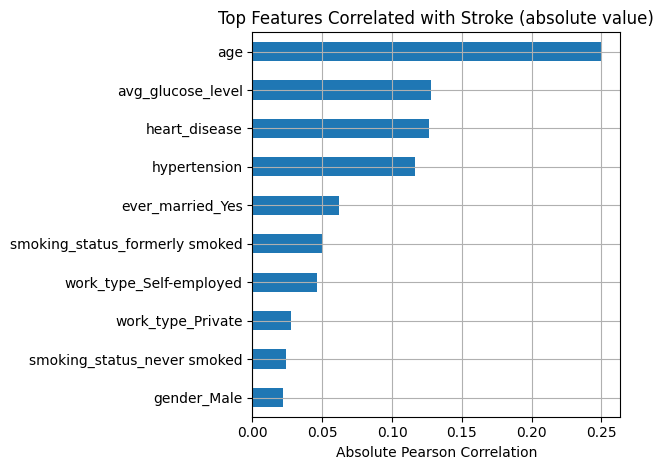

In [10]:
# 4. Feature Check

# 4a. Absolute feature correlation with stroke

# Compute absolute correlation between each feature and stroke label
cor_scores = X.corrwith(y).abs().sort_values(ascending=False)

# Show top 10 features
top_features = cor_scores.head(10)
print("Top features correlated with stroke:")
display(top_features)

# Visualize as bar plot
top_features.plot(kind='barh')
plt.title("Top Features Correlated with Stroke (absolute value)")
plt.xlabel("Absolute Pearson Correlation")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.grid(True)
plt.show()



Top features correlated with stroke:


,0
age,0.250861
avg_glucose_level,0.127790
heart_disease,0.126854
hypertension,0.116229
ever_married_Yes,0.062278
smoking_status_formerly smoked,0.050222
work_type_Self-employed,0.046515
work_type_Private,0.027623
smoking_status_never smoked,0.023949
gender_Male,0.021862


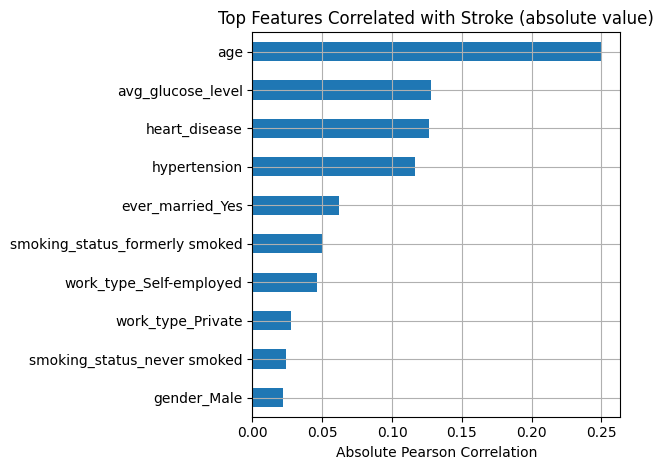

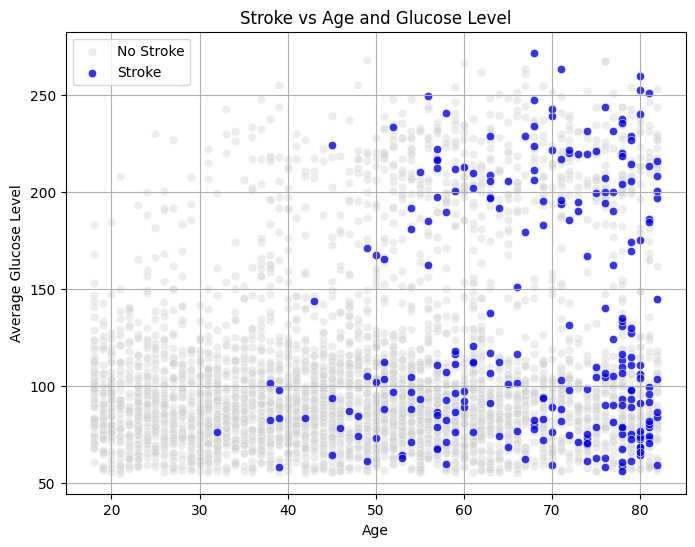

In [12]:
# 4b. Plot stroke vs non-stroke cases by age and glucose level.

plt.figure(figsize=(8, 6))

# Plot non-stroke cases (gray background)
sns.scatterplot(data=df[df['stroke'] == 0], x='age', y='avg_glucose_level',
                color='lightgray', alpha=0.4, label='No Stroke')

# Plot stroke cases on top
sns.scatterplot(data=df[df['stroke'] == 1], x='age', y='avg_glucose_level',
                color='blue', alpha=0.8, label='Stroke')

plt.title('Stroke vs Age and Glucose Level')
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')
plt.grid(True)
plt.legend()
plt.show()




In [13]:
# Step 5: Split into train/test
from sklearn.model_selection import train_test_split

# Split with stratification to preserve stroke/no-stroke ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3, # means 70% is training # 30% is testing
    stratify=y,
    random_state=2025
)



In [1]:
# Step 6: Train Random Forest
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None, # switch in the integer '5' to see the different results
    min_samples_split=2,
    min_samples_leaf=1,

    random_state=2025,
    class_weight='balanced_subsample'
)
rf_model.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [19]:
# Step 7: Predict and Evaluate on Train Set

from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, roc_curve, auc,
    precision_recall_curve, f1_score, precision_score, recall_score, roc_auc_score
)

y_train_proba = rf_model.predict_proba(X_train)[:, 1]

thresh = 0.5

y_train_pred = (y_train_proba >= thresh).astype(int)

print("Train Set Evaluation")
train_acc = accuracy_score(y_train, y_train_pred)
train_prec = precision_score(y_train, y_train_pred)
train_rec = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_auc = roc_auc_score(y_train, y_train_proba)

print(f"Accuracy: {train_acc:.3f}")
print(f"Precision: {train_prec:.3f}")
print(f"Recall: {train_rec:.3f}")
print(f"F1 Score: {train_f1:.3f}")
print(f"ROC AUC: {train_auc:.3f}")


Train Set Evaluation
Accuracy: 0.750
Precision: 0.173
Recall: 0.873
F1 Score: 0.288
ROC AUC: 0.895


In [20]:
# Step 8: Predict on Test Set
y_proba = rf_model.predict_proba(X_test)[:, 1]

thresh = 0.5

y_pred = (y_proba >= thresh).astype(int)


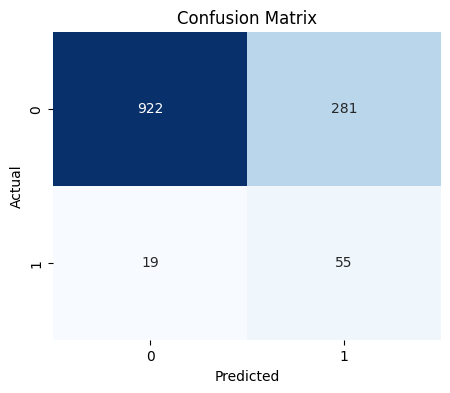

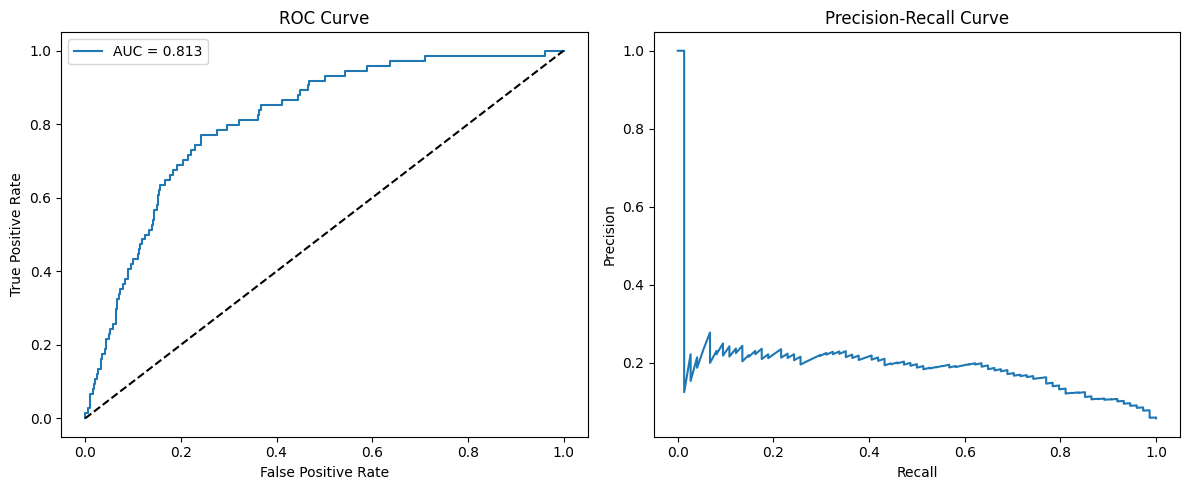

In [21]:
# Step 9: Evaluate model performance
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, roc_curve, auc,
    precision_recall_curve, f1_score, precision_score, recall_score, roc_auc_score
)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC and PR Curves
fpr, tpr, _ = roc_curve(y_test, y_proba)
precision, recall, _ = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(12, 5))

# ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

# PR Curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")

plt.tight_layout()
plt.show()


In [22]:
# 9a. Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = auc(*roc_curve(y_test, y_proba)[:2])

print(f"Accuracy: {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall: {rec:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"ROC AUC: {roc_auc:.3f}")

Accuracy: 0.765
Precision: 0.164
Recall: 0.743
F1 Score: 0.268
ROC AUC: 0.813


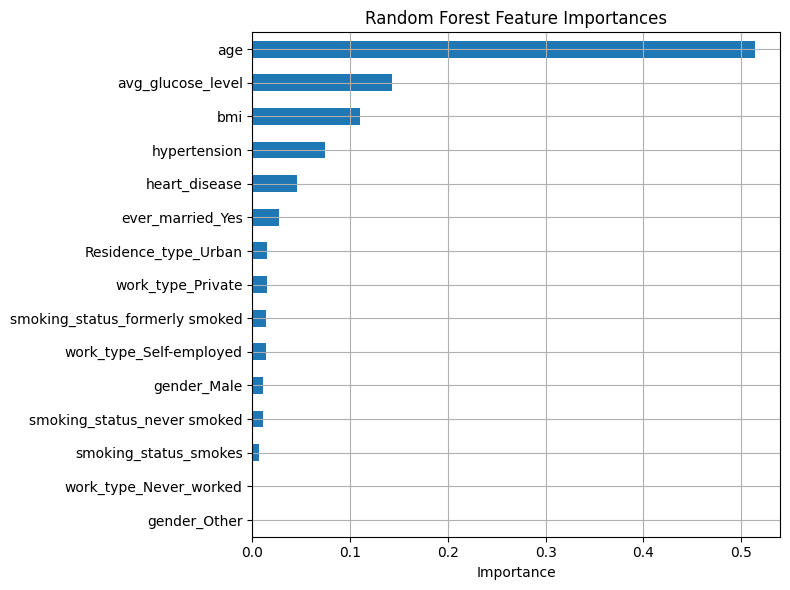

In [23]:
# 9b. Feature Importance
importances = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values()
plt.figure(figsize=(8, 6))
importances.plot(kind='barh')
plt.title("Random Forest Feature Importances")
plt.xlabel("Importance")
plt.grid(True)
plt.tight_layout()
plt.show()

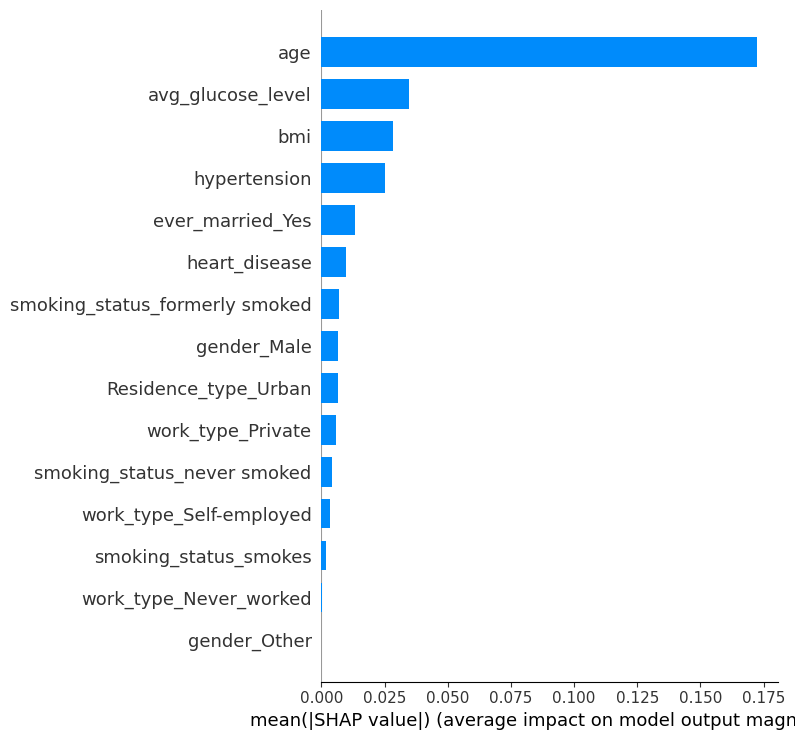

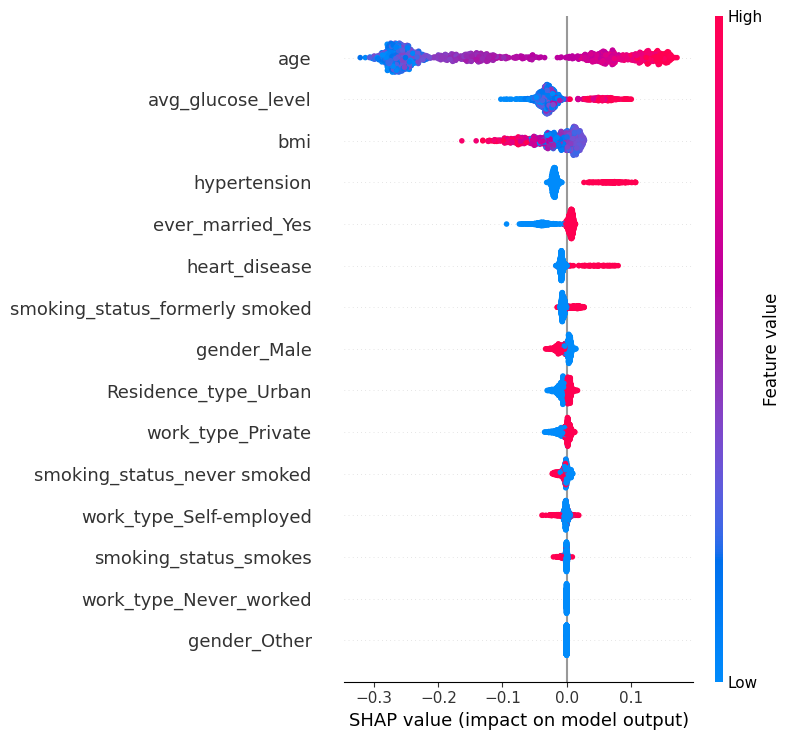

In [24]:
# 9c. SHAP

!pip install shap --quiet
import shap
shap.initjs()

explainer = shap.Explainer(rf_model)
shap_values = explainer.shap_values(X_test)
shap_c1 = shap_values[:, :, 1]

# Summary plot (for class 1: malignant)
shap.summary_plot(shap_c1, X_test, plot_type="bar")

# Optional: full summary plot with beeswarm layout
shap.summary_plot(shap_c1, X_test)